# Electronic Supplemental Material: New Insights into PCA + Varimax for

Psychological Researchers

A short commentary on Rohe & Zeng (2023)

Florian Pargent (LMU Munich)  
David Goretzko (Utrecht University)  
Timo von Oertzen (Bundeswehr University Munich and Max Planck Institute for Human Development)  
March 4, 2024

> **Important**
>
> This document is **an updated copy** of a [published commentary](https://doi.org/10.1093/jrsssb/qkad054), to showcase [Quarto manuscripts](https://quarto.org/docs/manuscripts/) in our [Quarto workshop](https://florianpargent.github.io/Quarto_LMU_OSC/). The official online repository of our published commentary can be found [here](https://osf.io/5symf/).

# A Short Commentary on Rohe & Zeng (2023)

In their paper *“Vintage factor analysis with varimax performs statistical inference”*, Rohe and Zeng \[R&Z; Rohe & Zeng ([2023](#ref-rohe2023vintage))\] demonstrate the usefulness of principal component analysis with varimax rotation (PCA+VR), a combination they call *vintage factor analysis*. The authors show that PCA+VR can be used to estimate factor scores and factor loadings, if a certain leptokurtic condition is fulfilled that can be assessed by simple visual diagnostics. In a side result, they also imply that PCA+VR is able to estimate factor scores even if the latent factors are correlated. In our commentary *“New Insights into PCA + Varimax for Psychological Researchers”* ([Pargent et al., 2023](#ref-pargent2023discussion)), we briefly discuss some implications of these results for psychological research and note that the suggested diagnostics of “radial streaks” might give less clear results in typical psychological applications. The commentary includes extensive *electronic supplemental materials*, containing a data example and a small simulation on estimating correlated factors, that can be found at <https://osf.io/5symf/>.

In the current electronic supplementary materials, we present i) an exemplary data analysis that is discussed in our comment, and ii) a small simulation demonstrating the ability of PCA+VR to estimate correlated factors.

# Data Example: The PhoneStudy

In [ ]:
library(knitr)
library(vsp)
library(Matrix)
library(scales)


In contrast to the examples in R&Z which only deal with sparse binary network data, psychological applications (traditionally) deal with i) questionnaire items or (increasingly) ii) digital data, e.g., mobile sensing. The $A$ matrix consists of i) integer-valued responses on $d$ Likert items or ii) continuous values on $d$ sensing variables, by $n$ persons. Degree normalization discussed by R&Z does not seem suitable here and z-standardization is often required to detect meaningful factors in practice. We also do not share R&Z’s enthusiasm that “radial streaks” are common.

For the following demonstration, we use the publicly available *PhoneStudy* behavioral patterns dataset, which has been used to predict human personality from smartphone usage data ([Stachl et al., 2020](#ref-stachl2020predicting)). The *PhoneStudy* collected i) self-reported questionnaire data of personality traits measured with the German Big Five Structure Inventory \[BFSI; 5 factors and 30 facets, Arendasy et al. ([2011](#ref-arendasy_manual_2011))\], ii) demographic variables (age, gender, education), and iii) behavioral data from smartphone sensing (e.g., communication & social behavior, app-usage, music consumption, overall phone usage, day-nighttime activity), bundled from several smaller studies. The mobile sensing data was recorded for up to 30 days on the personal smartphone of study volunteers.

Item responses to the personality questionnaire are contained in the file *datasets/Items.csv* while aggregated smartphone sensing variables are contained in the file *datasets/clusterdata.RDS*. Both can be downloaded from <https://osf.io/fxv3k/download>. We include copies of the aggregated datasets in our project repository for convenience. More details on the *PhoneStudy* data can be found in Stachl et al. ([2020](#ref-stachl2020predicting)). Mobile sensing variables are described in more detail at <https://compstat-lmu.shinyapps.io/Personality_Prediction/#section-datadict>.

## Item Response Data

Item responses to the 300 personality items of the Big Five questionnaire are almost complete and we decided to use complete case analysis here, although imputation would be possible as well.

In [ ]:
phonedata_items = read.csv2("datasets/Items.csv")
phonedata_items = na.omit(phonedata_items[, 3:302])


As is common for psychometric analyses, we standardize the item response data with `scale` and convert the data.frame to a *dgCMatrix* that can be analyzed with `vsp` R package. However, not standardizing the items does not change the following results much here because there cannot be large outliers in item responses and item variances due to the fixed response format (all items are measured on a Likert scale with 4 labeled categories).

In [ ]:
items_mat_z = as.matrix(scale(phonedata_items))
colnames(items_mat_z) = colnames(phonedata_items)
items_mat_z = as(items_mat_z, "dgCMatrix")


The screeplot suggests a decrease in singular values after the 5th component. This is in line with the theory behind the questionnaire that was constructed to measure the Big Five personality factors.

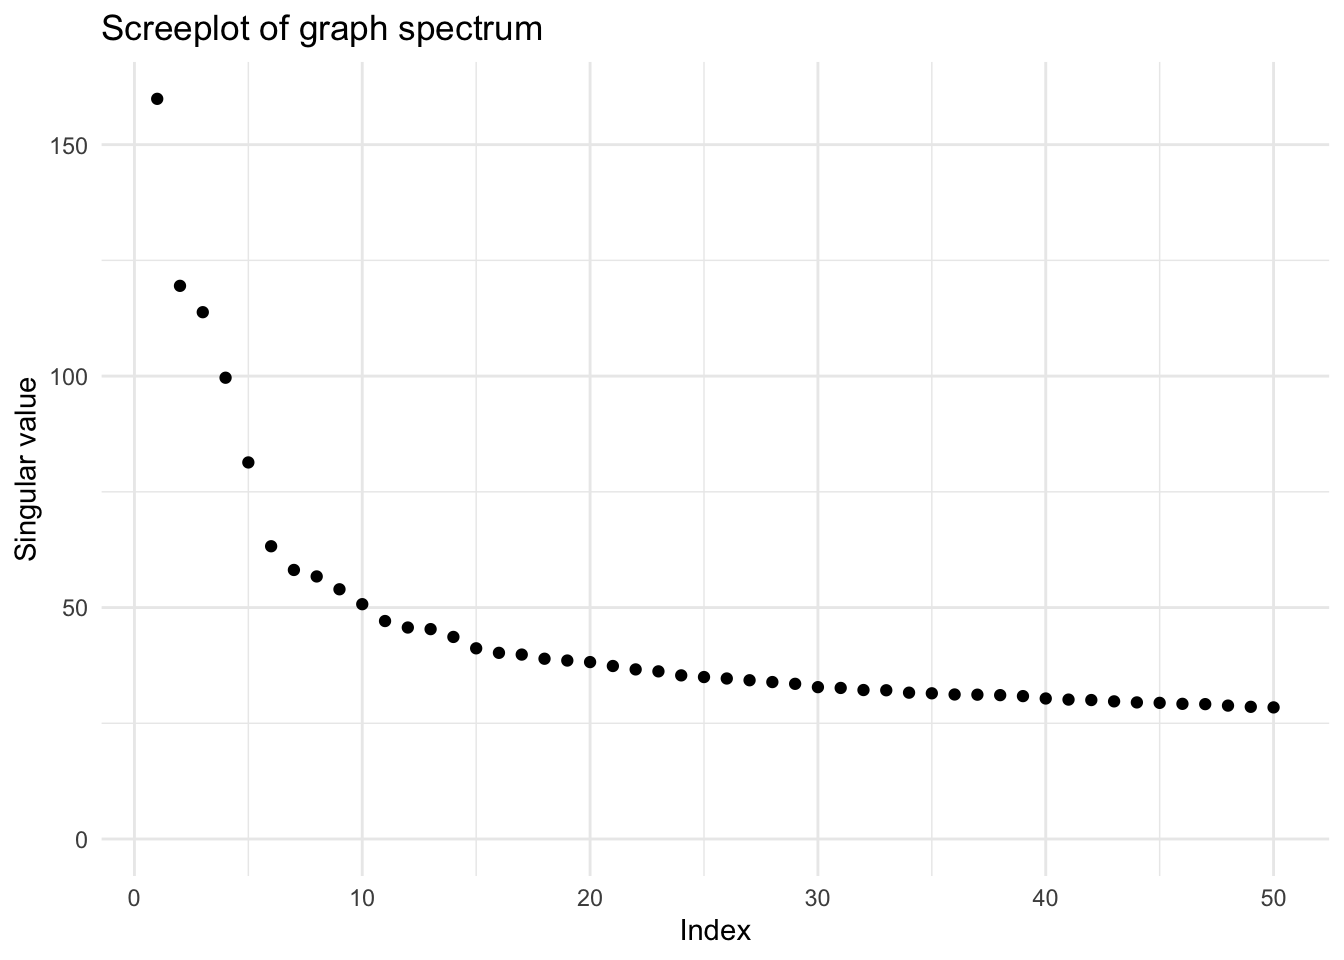

In [ ]:
screeplot(vsp(items_mat_z, rank = 50,
  degree_normalize = FALSE, center = FALSE))


Note that each Big Five factor is represented in the questionnaire by 6 lower order personality facets measured by 10 items each. Thus, theory would suggest that extracting 30 components should also be meaningful.

To keep it simple, we extract only 5 components here.

In [ ]:
pca_items_z = vsp(items_mat_z, rank = 5,
  degree_normalize = FALSE, center = FALSE)


Note that we do set `degree_normalize = FALSE` and `center = FALSE` because we do not analyze binary network data and we have already standardized our item responses.

We search for **radial streaks** in the estimated component and loading matrices:

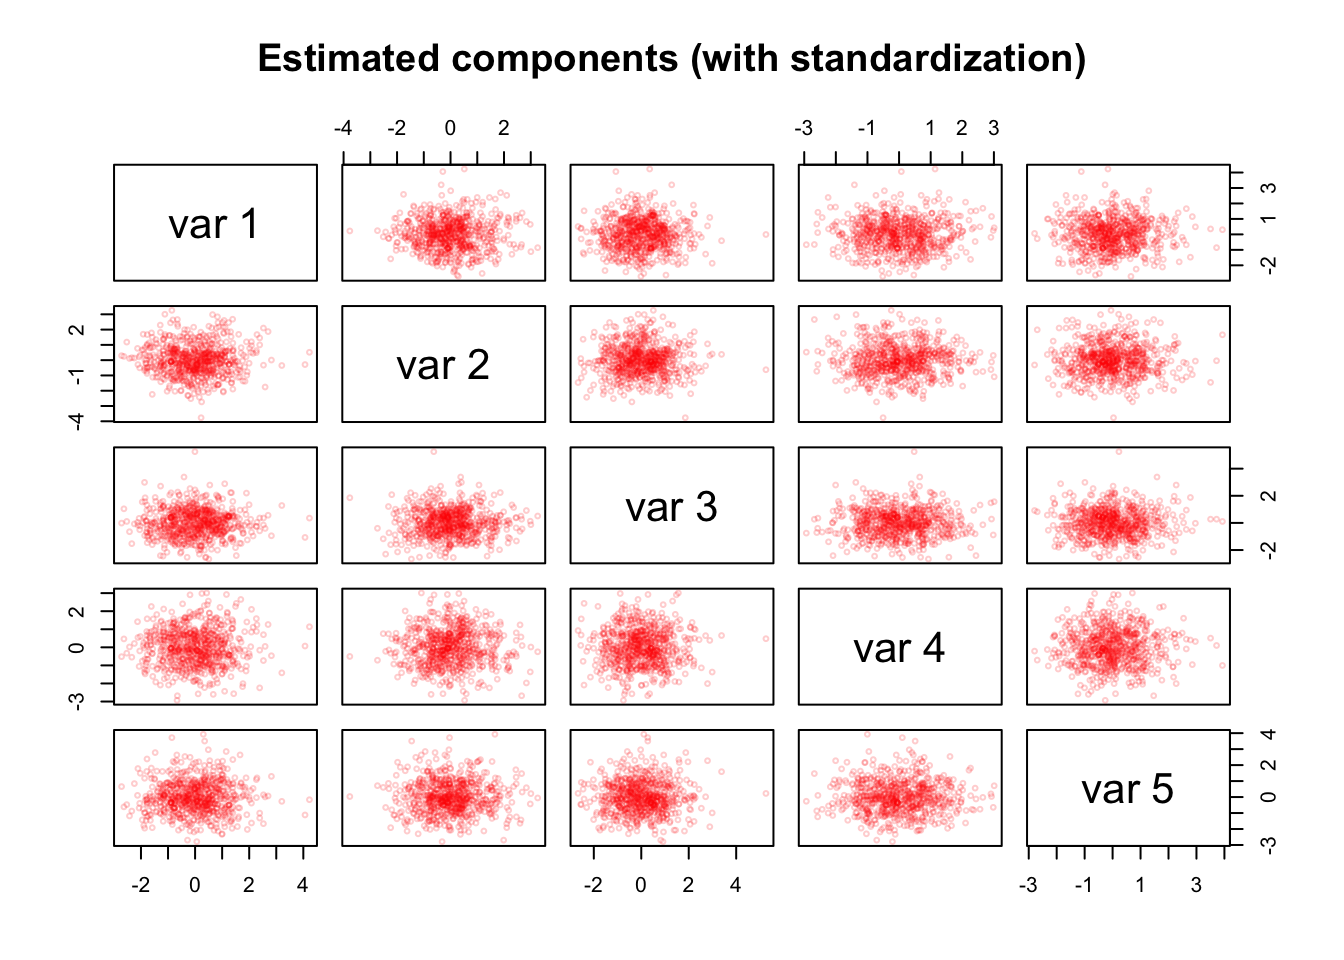

In [ ]:
pairs(as.matrix(pca_items_z$Z[, 1:5]), cex = 0.5, col = alpha("red", alpha = 0.2), 
  main = "Estimated components (with standardization)")


We do not find streaks in the estimated component matrix $\hat{Z}$.

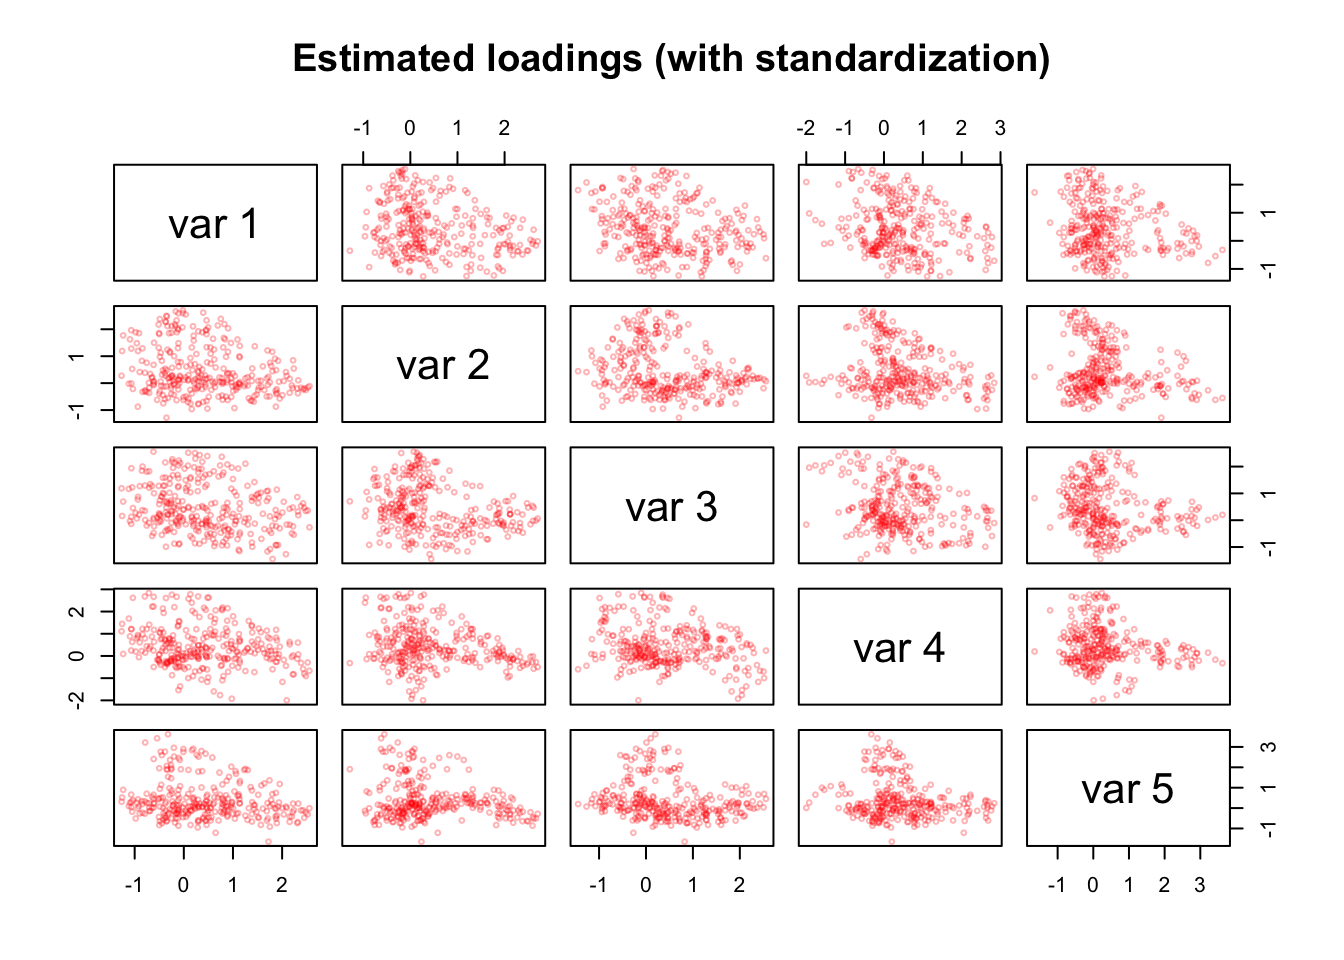

In [ ]:
pairs(as.matrix(pca_items_z$Y[, 1:5]), cex = 0.5, col = alpha("red", alpha = 0.3), 
  main = "Estimated loadings (with standardization)")


However, we find noisy streaks in the estimated loading matrix $\hat{Y}$. This **simple structure** is in line with the construction process of the personality questionnaire, which has the goal that each item measures only a single Big Five factor. Streaks are even more pronounced when extracting 30 components.

Finally, we interpret the components by highlighting the 10 items with the highest absolute loadings on each component.

In [ ]:
n = 10
top_vars_items_z = data.frame(
  Extraversion = names(sort(abs(pca_items_z$Y[, 1]), decreasing = TRUE)[1:n]),
  Conscientiousness = names(sort(abs(pca_items_z$Y[, 2]), decreasing = TRUE)[1:n]),
  Agreeableness = names(sort(abs(pca_items_z$Y[, 3]), decreasing = TRUE)[1:n]),
  EmotionalStability = names(sort(abs(pca_items_z$Y[, 4]), decreasing = TRUE)[1:n]),
  Openness = names(sort(abs(pca_items_z$Y[, 5]), decreasing = TRUE)[1:n])
)
kable(top_vars_items_z)


  ----------------------------------------------------------------------------------
  Extraversion   Conscientiousness   Agreeableness   EmotionalStability   Openness
  -------------- ------------------- --------------- -------------------- ----------
  E1.1           C6.8                A6.8            ES6.10               O2.6

  E4.3           C2.5                O3.3            ES1.3                O2.5

  E2.7           C4.9                A6.10           ES2.3                O6.2

  E2.2           ES5.6               A6.2            ES2.9                O2.10

  E2.4           C3.6                O3.7            ES2.7                O5.4

  E2.8           C5.6                E1.7            ES2.1                O1.6

  E4.5           C3.1                A6.6            ES2.8                O1.2

  ES4.10         C2.7                A6.4            ES3.7                O1.9

  E2.6           C4.5                A6.5            ES1.4                O2.8

  E3.2           C2.3                O3.1            ES2.6                O2.1
  ----------------------------------------------------------------------------------


With few exceptions, the item labels indicate that the implied Big Five personality factors (*Extraversion*, *Conscientiousness*, *Agreeableness*, *Emotional Stability*, *Openness*) were recovered as expected.

## Mobile Sensing Data

In [ ]:
phonedata_sensing = readRDS(file = "datasets/clusterdata.RDS")
phonedata_sensing = phonedata_sensing[, c(1:1821)]


The smartphone sensing data contains 1821 preprocessed variables. Of these variables, 772 contain missing values and not a single person has complete data on all variables. Thus, imputation of missing values seems a necessity when working with these data. We use very simple mean imputation here which is sufficient for the goal of our demonstration.

In [ ]:
phonedata_sensing_imp = phonedata_sensing
for(col in colnames(phonedata_sensing_imp)) {
  phonedata_sensing_imp[which(is.na(phonedata_sensing_imp[[col]])), col] <-
    mean(phonedata_sensing_imp[[col]], na.rm = TRUE)
}


However, our results are quite similar for more elaborate imputation schemes. For the interested reader, we prepared data imputed with the `miceRanger` package in the [sensitivity analysis document](sensitivity_analysis.qmd).

If you want to use that data, you have to set `eval: true` or manually run the following chunk in the *.qmd* file.

In [ ]:
library(miceRanger)
mice_obj_sensing = readRDS(file = "mice_obj_sensing.RDS")
phonedata_sensing_imp = as.data.frame(completeData(mice_obj_sensing)[[1]])


### Analysis with Standardization

In contrast to the item response data, there is a huge difference in the standard deviations of the smartphone sensing variables.

In [ ]:
round(quantile(sapply(phonedata_sensing_imp, sd)), 2)


        0%        25%        50%        75%       100% 
      0.02       0.21       2.13      12.81 1723949.43 

Thus, it is important to standardize the variables before further analysis.

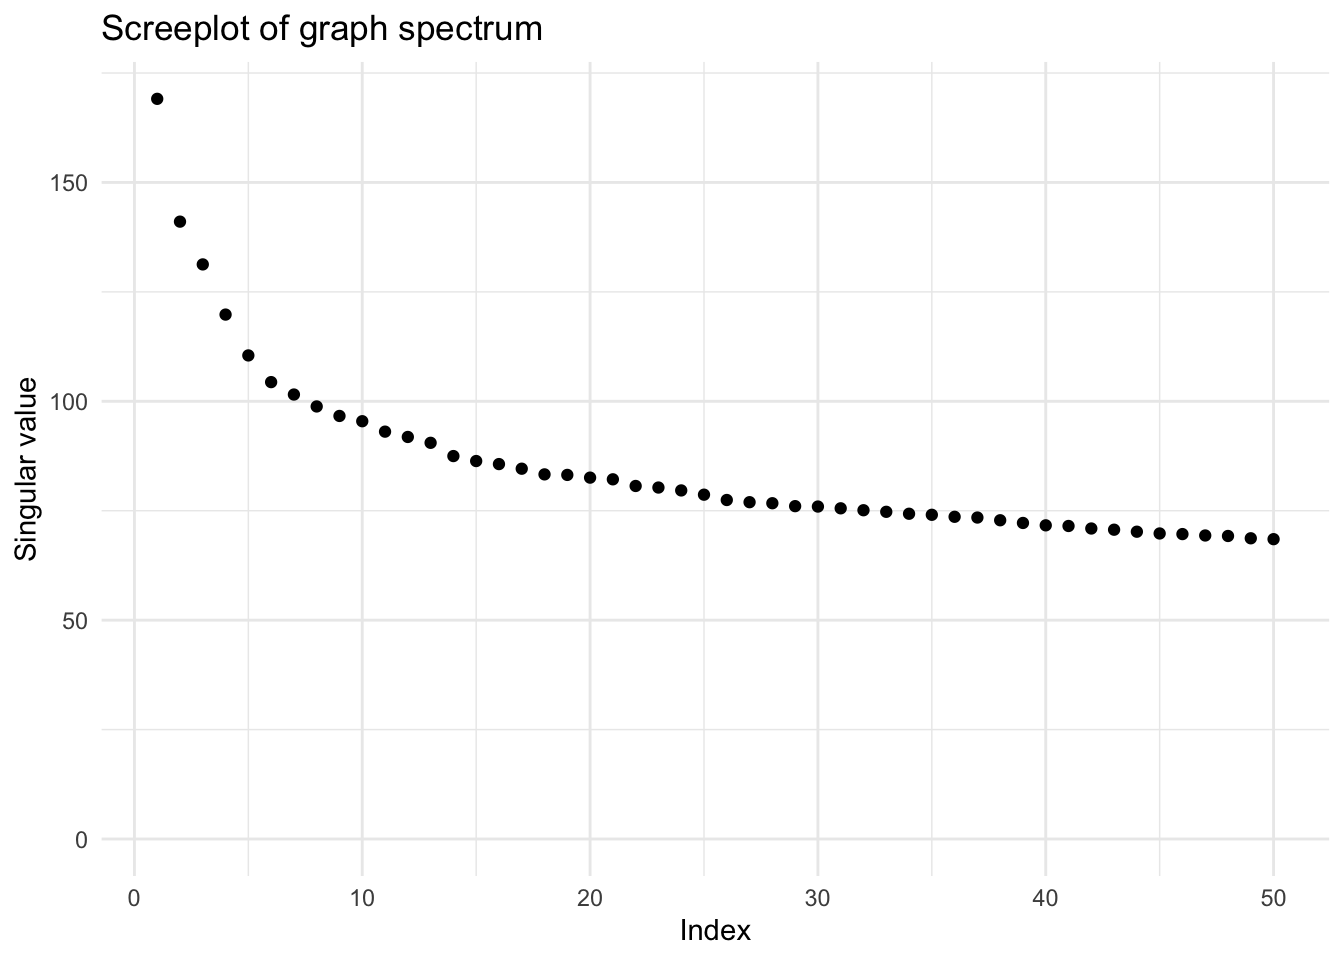

In [ ]:
sensing_mat_imp_z = as.matrix(scale(phonedata_sensing_imp))
colnames(sensing_mat_imp_z) = colnames(phonedata_sensing_imp)
sensing_mat_imp_z = as(sensing_mat_imp_z, "dgCMatrix")
screeplot(vsp(sensing_mat_imp_z, rank = 50, 
  degree_normalize = FALSE, center = TRUE))


The screeplot does not show a clear gap or elbow for the smartphone sensing data. To keep it simple, we extract only 5 components here, but higher numbers also provide meaningful insights.

Again, we do not use degree normalization but we set `center = TRUE` despite standardizing the columns because row means also differ to some extent.

In [ ]:
pca_sensing_imp_z = vsp(sensing_mat_imp_z, rank = 5, 
  degree_normalize = FALSE, center = TRUE)


We search for **radial streaks** in the estimated component and loading matrices:

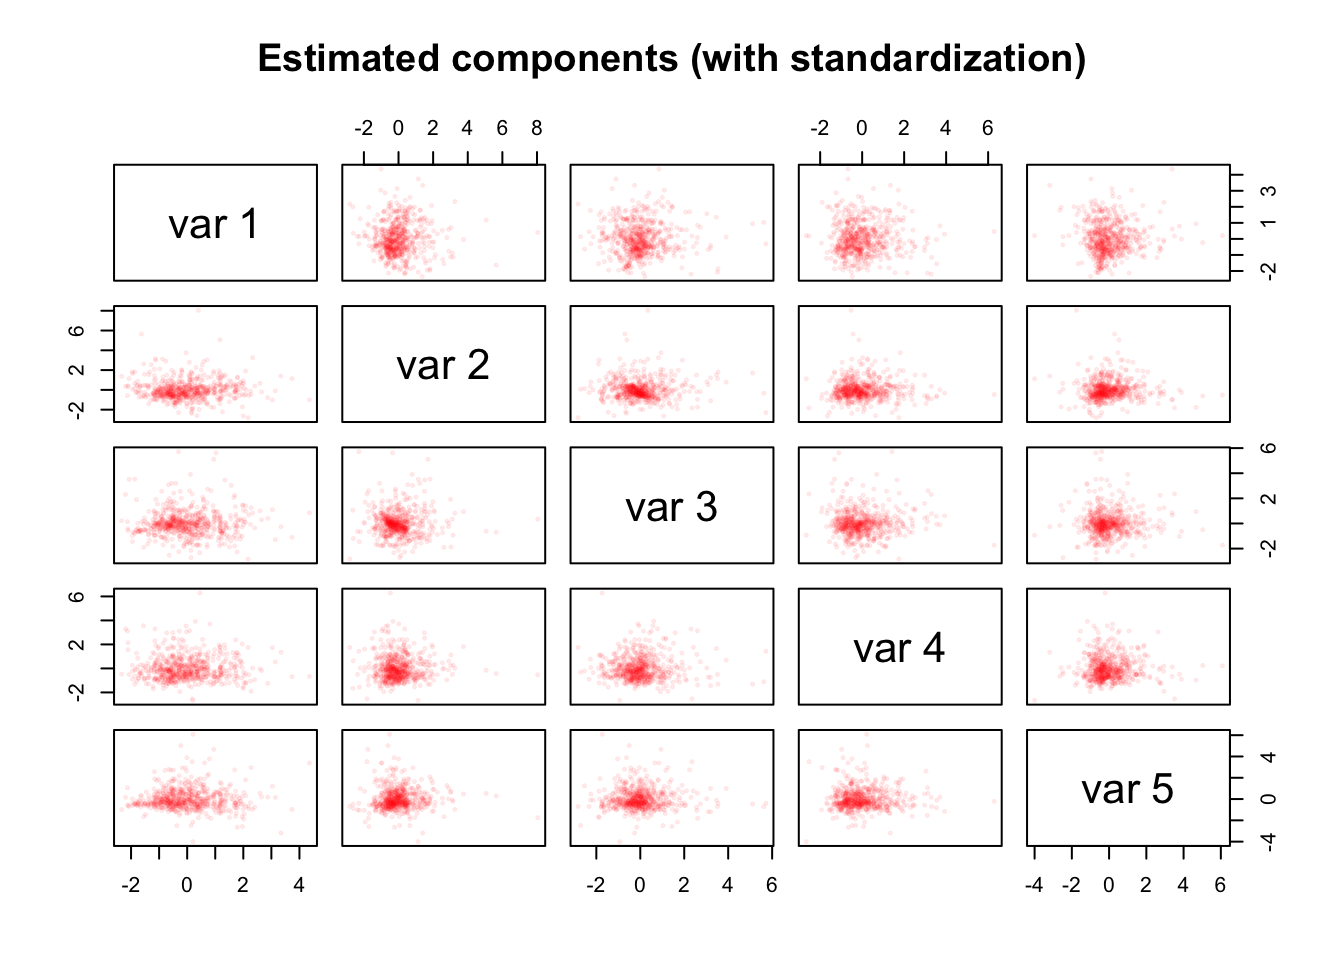

In [ ]:
pairs(as.matrix(pca_sensing_imp_z$Z[, 1:5]), cex = 0.3, col = alpha("red", alpha = 0.1), 
  main = "Estimated components (with standardization)")


We do not find a clear indication of streaks in the estimated component matrix $\hat{Z}$.

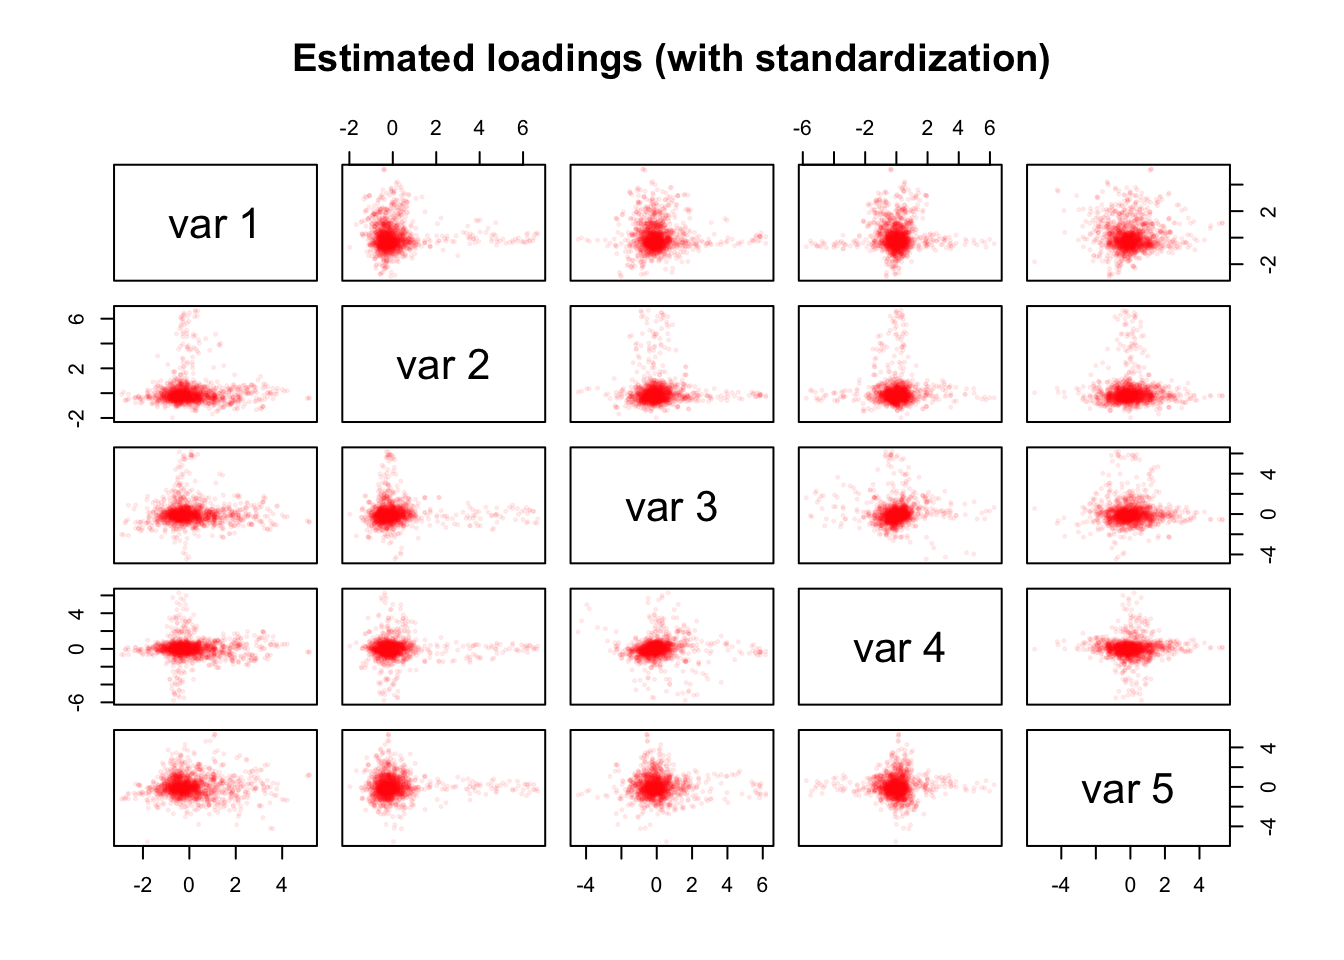

In [ ]:
pairs(as.matrix(pca_sensing_imp_z$Y[, 1:5]), cex = 0.3, col = alpha("red", alpha = 0.1), 
  main = "Estimated loadings (with standardization)")


However, we find streaks in the estimated loading matrix $\hat{Y}$. In contrast to the items of the personality questionnaire that have been constructed with simple structure in mind, no simple structure was implied when constructing the smartphone sensing variables. Nonetheless, the streaks would suggest that the smartphone sensing variables can be meaningfully clustered in this dataset.

For interpretation, we again highlight the 10 variables with the highest absolute loadings on each component.

In [ ]:
n = 10
top_vars_z = data.frame(
  Apps_Usage = names(sort(abs(pca_sensing_imp_z$Y[, 1]), decreasing = TRUE)[1:n]),
  Calls = names(sort(abs(pca_sensing_imp_z$Y[, 2]), decreasing = TRUE)[1:n]),
  Music_Songs = names(sort(abs(pca_sensing_imp_z$Y[, 3]), decreasing = TRUE)[1:n]),
  Music_Audio_Features = names(sort(abs(pca_sensing_imp_z$Y[, 4]), decreasing = TRUE)[1:n]),
  Terrain = names(sort(abs(pca_sensing_imp_z$Y[, 5]), decreasing = TRUE)[1:n])
)
kable(top_vars_z)


  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  Apps_Usage                             Calls                           Music_Songs                    Music_Audio_Features              Terrain
  -------------------------------------- ------------------------------- ------------------------------ --------------------------------- -----------------------------------------------
  daily_mean_num_unique_apps_week        daily_mean_num_cont_call        daily_mean_num_song            mean_music_loudness               daily_mean_neg_elev_change

  daily_mean_num_unique_apps             daily_mean_num_cont             daily_mean_duration_music      mean_music_loudness_weekday       daily_mean_elev_change

  daily_mean_num_unique_apps_weekend     daily_mean_num_cont_week        daily_max_num_uniq_song        sd_music_loudness                 daily_mean_pos_elev_change

  daily_mean_num_unique_Camera           daily_mean_num_cont_call_out    daily_mean_num_song_weekdays   mean_music_energy                 daily_mean_elev_change_weekdays

  daily_mean_num_unique_Camera_week      daily_sd_num_call_in            daily_mean_num_uniq_song       mean_music_loudness_weekend       daily_mean_elev_change_weekend

  daily_mean_num_unique_Camera_weekend   IVI_calls                       num_uniq_songs                 mean_music_acousticness           daily_sd_elev_change

  daily_mean_sum_events_daytime          daily_mean_num_cont_call_miss   daily_sd_num_song              mean_music_energy_weekday         daily_mean_num\_.com.sonyericsson.home

  daily_mean_sum_events_night            daily_mean_num_cont_weekend     num_songs                      mean_music_acousticness_weekday   daily_mean_num\_.com.sec.android.app.launcher

  daily_mean_num_unique_Gallery          daily_mean_num_call_out         daily_mean_num_uniq_alb        sd_music_acousticness             daily_mean_num\_.com.sec.android.gallery3d

  daily_mean_num_unique_Gallery_week     daily_mean_num_cont_call_in     daily_sd_duration_music        mean_music_energy_weekend         daily_mean_num\_.com.sonyericsson.album
  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


To summarize, with careful preprocessing and appropriate data standardization, PCA+VR seems to meaningfully cluster the smartphone sensing variables, as indicated by radial streaks in the estimated loading matrix $\hat{Y}$. However, we did not find streaks in the estimated component matrix $\hat{Z}$ so we cannot necessarily have high confidence that PCA+VR was able to estimate well identified person scores on these components.

The following cautionary example showcases what can happen when the smartphone sensing data is not preprocessed with enough care.

### A Cautionary example: Analysis without Standardization

To simulate mindless data analysis, we do not standardize the smartphone sensing variables and use the default `degree_normalize = TRUE` in the `vsp` call, although this should not be a meaningful setting because we do not analyze binary network data here.

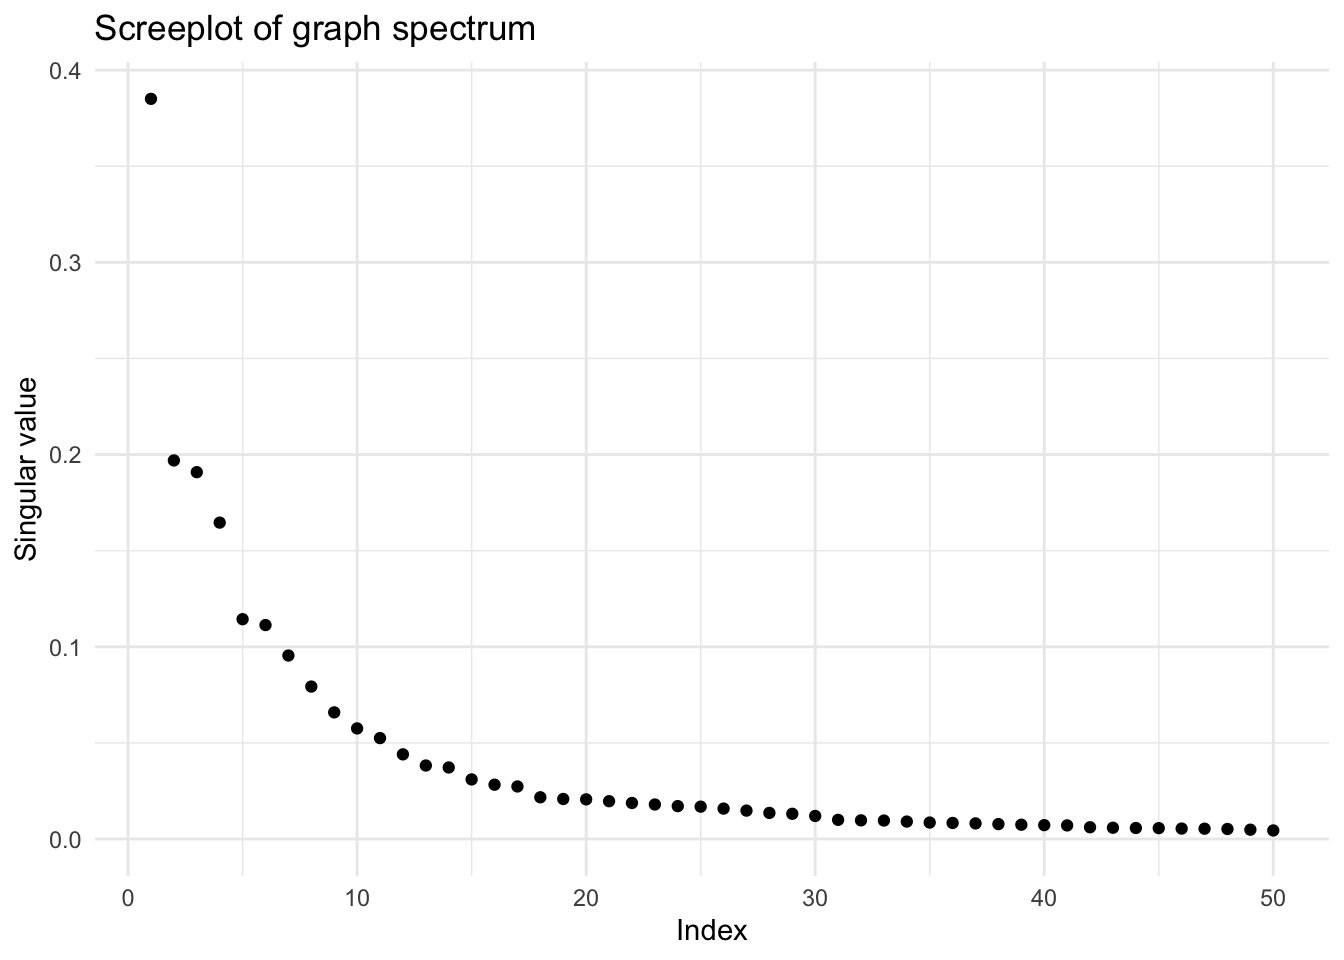

In [ ]:
sensing_mat_imp = as.matrix(phonedata_sensing_imp)
colnames(sensing_mat_imp) = colnames(phonedata_sensing_imp)
sensing_mat_imp = as(sensing_mat_imp, "dgCMatrix")
screeplot(vsp(sensing_mat_imp, rank = 50,
  degree_normalize = TRUE, center = TRUE))


With these settings, the screeplot shows substantial gaps (in contrast to the previous analysis with standardization). To keep it simple, we decided to extract 5 components here, but the main insights from this exercise do not seem to depend on this number.

When searching for **radial streaks** in the estimated component and loading matrices, we notice interesting changes compared to the analysis with standardized variables

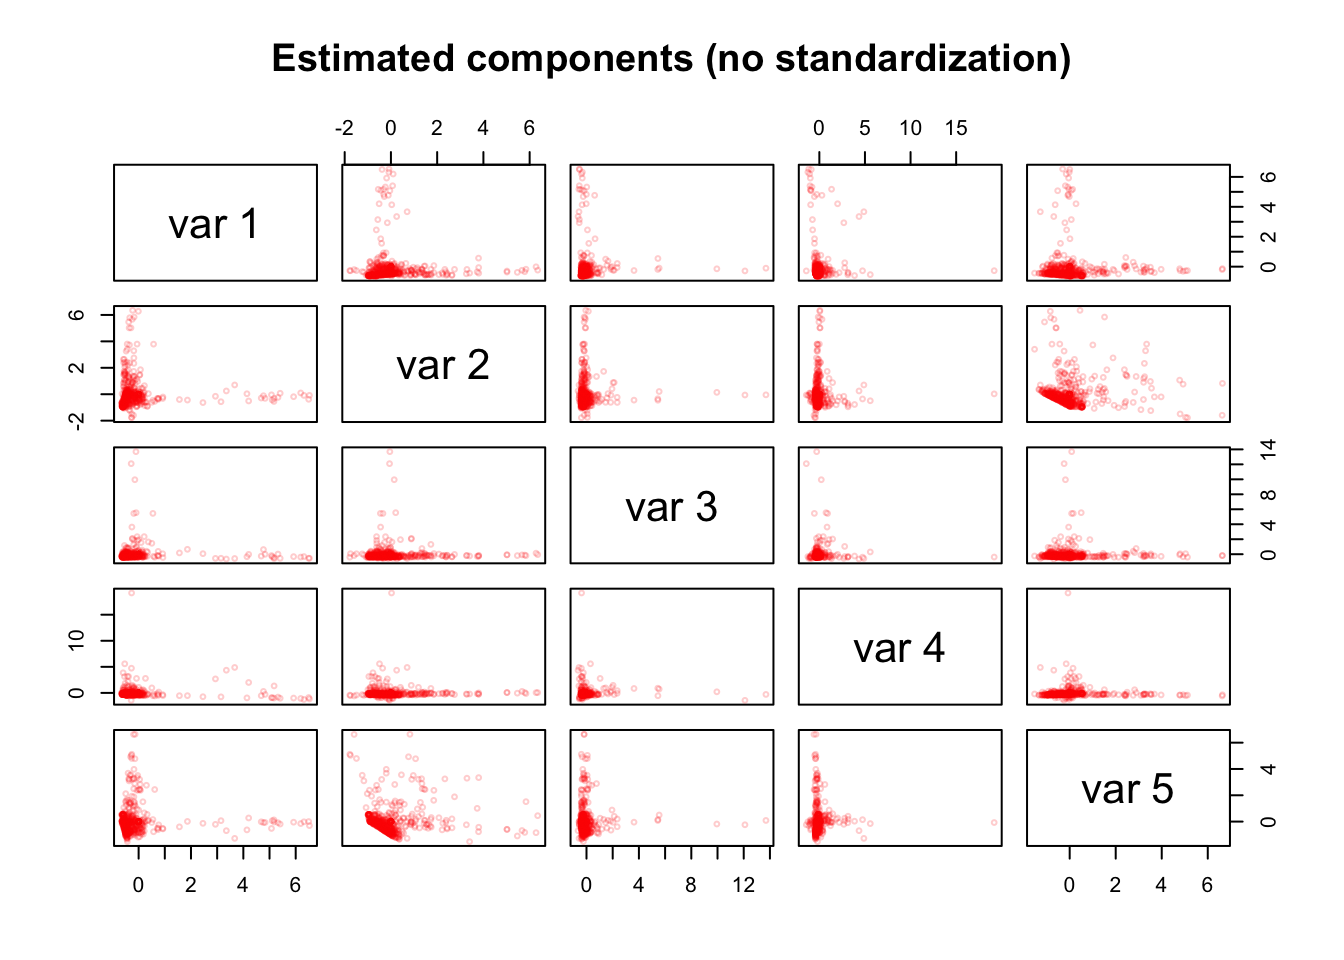

In [ ]:
pca_sensing_imp = vsp(sensing_mat_imp, rank = 5,
  degree_normalize = TRUE, center = TRUE)
pairs(as.matrix(pca_sensing_imp$Z[, 1:5]), cex = 0.5, col = alpha("red", alpha = 0.2), 
  main = "Estimated components (no standardization)")


With these settings, we *do* find beautiful streaks in the estimated component matrix $\hat{Z}$.

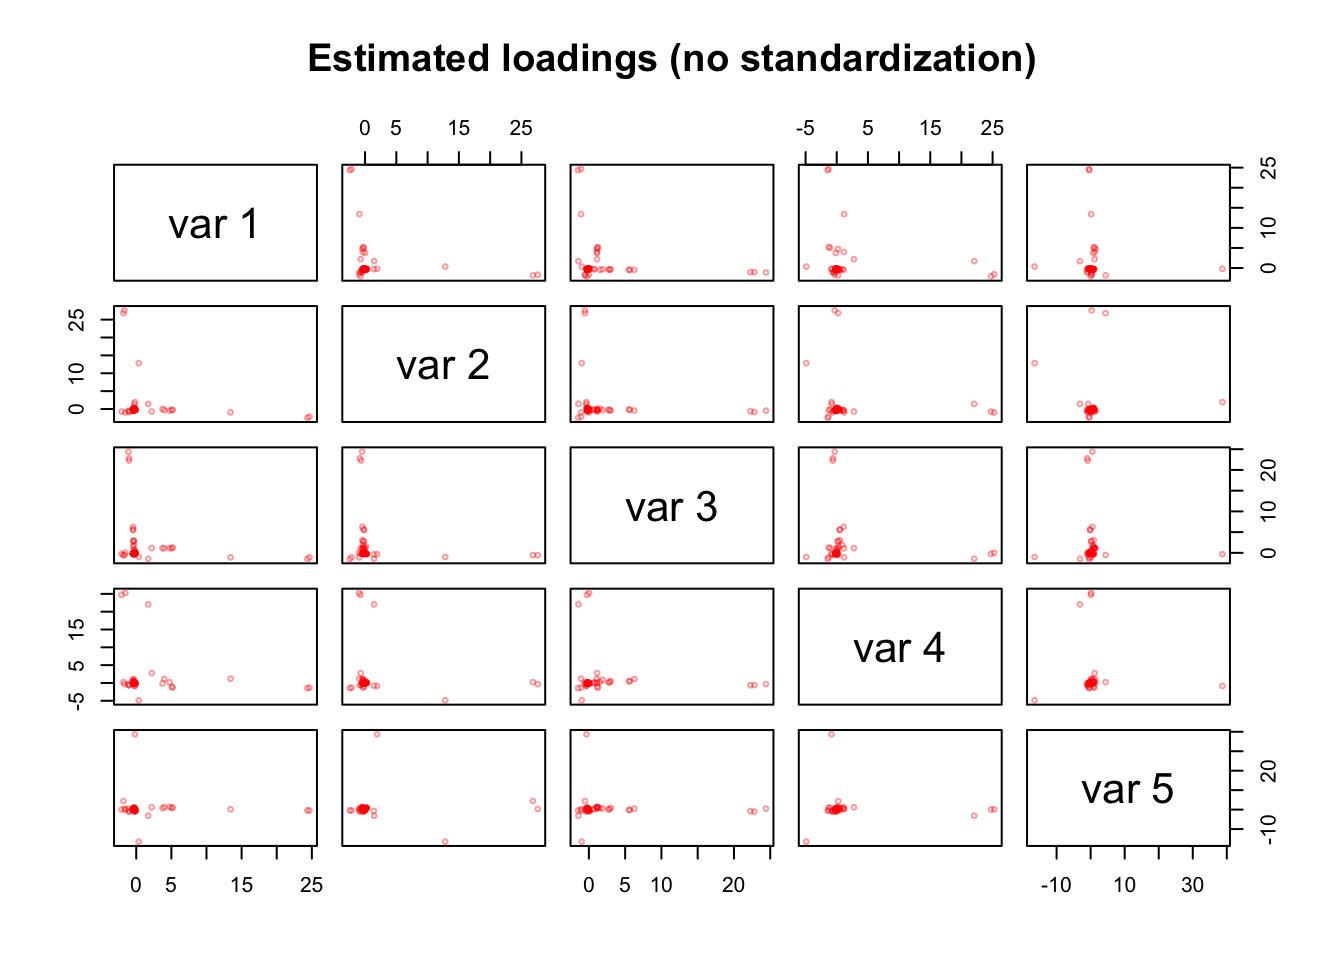

In [ ]:
pairs(as.matrix(pca_sensing_imp$Y[, 1:5]), cex = 0.5, col = alpha("red", alpha = 0.4), 
  main = "Estimated loadings (no standardization)")


In contrast, streaks in the estimated loading matrix $\hat{Y}$ are very extreme. To a careful analyst, this might perhaps raise some alarms that something might be wrong here…

In [ ]:
n = 20
top_vars = data.frame(
  GPS1 = names(sort(abs(pca_sensing_imp$Y[, 1]), decreasing = TRUE)[1:n]),
  GPS2 = names(sort(abs(pca_sensing_imp$Y[, 2]), decreasing = TRUE)[1:n]),
  GPS3 = names(sort(abs(pca_sensing_imp$Y[, 3]), decreasing = TRUE)[1:n]),
  GPS4 = names(sort(abs(pca_sensing_imp$Y[, 4]), decreasing = TRUE)[1:n]),
  GPS5 = names(sort(abs(pca_sensing_imp$Y[, 5]), decreasing = TRUE)[1:n])
)
red_vars = unique(unlist(top_vars))
kable(top_vars)


  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  GPS1                                 GPS2                                 GPS3                                 GPS4                                 GPS5
  ------------------------------------ ------------------------------------ ------------------------------------ ------------------------------------ ------------------------------------
  maxDistance                          huberM_time_spent_home               huberM_distance_covered_weekend      huberM_daily_max_dist_home           huberM_time_spent_home_weekend

  max_distance_home                    huberM_time_spent_home_weekday       huberM_distance_covered_daily        huberM_daily_max_dist_home_weekday   durationHome

  rog                                  durationHome                         huberM_distance_covered_weekday      huberM_daily_max_dist_home_weekend   huberM_time_spent_home_weekday

  SDD                                  max_distance_home                    huberM_max_dist_two_points_weekend   durationHome                         huberM_daily_max_dist_home_weekend

  SDD_daytime                          maxDistance                          huberM_max_dist_two_points_daily     SDD_nighttime                        SDD_weekend

  SDD_weekend                          huberM_time_spent_home_weekend       huberM_max_dist_two_points_weekday   max_distance_home                    SDD_sat

  SDD_sat                              huberM_daily_max_dist_home_weekend   huberM_rog_weekends                  maxDistance                          SDD_nighttime

  SDD_weekday                          huberM_daily_time_spent_home         huberM_rog_daily                     SDD                                  SDD

  SDD_nighttime                        huberM_daily_max_dist_home           huberM_rog_weekdays                  rog                                  mean_dur_wakeLeaveHome_weekend

  huberM_daily_max_dist_home_weekday   rog                                  Qn_rog_weekends                      SDD_sat                              huberM_distance_covered_daily

  huberM_time_spent_home_weekday       huberM_distance_covered_daily        huberM_rog_nightly                   huberM_max_dist_two_points_weekend   mean_time_firstLeave

  huberM_daily_max_dist_home_weekend   huberM_daily_max_dist_home_weekday   max_distance_home                    SDD_daytime                          mean_time_LeaveHome_weekday

  huberM_time_spent_home               SDD_nighttime                        huberM_daily_max_dist_home_weekend   Qn_rog_weekends                      huberM_rog_weekends

  huberM_daily_max_dist_home           huberM_distance_covered_weekday      SDD                                  huberM_time_spent_home_weekend       SDD_daytime

  huberM_distance_covered_weekend      huberM_distance_covered_weekend      SDD_daytime                          huberM_daily_time_spent_home         huberM_distance_covered_weekday

  huberM_distance_covered_weekday      huberM_max_dist_two_points_weekend   SDD_weekday                          huberM_distance_covered_weekday      mean_dur_wakeLeave

  huberM_distance_covered_daily        SDD_weekend                          SDD_nighttime                        huberM_distance_covered_daily        mean_time_lastHome

  huberM_max_dist_two_points_daily     huberM_rog_weekends                  SDD_weekend                          huberM_rog_weekends                  huberM_rog_nightly

  huberM_max_dist_two_points_weekend   mean_time_lastHome                   maxDistance                          huberM_max_dist_two_points_daily     mean_time_LeaveHome

  huberM_max_dist_two_points_weekday   daily_sd_elev_change                 SDD_sat                              huberM_max_dist_two_points_weekday   mean_time_lastHome_weekend
  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Indeed, when looking at the top variables with the highest absolute loadings on each component, they do **not** seem to have a simple structure and are hard to interpret.

In fact, the top 20 variables loading on all components include only 36 unique variables.

Most of these variables seem to be based on GPS data in some way.

All of these variables have extremely high standard deviations.

In [ ]:
sapply(phonedata_sensing_imp[, red_vars], sd)


                       maxDistance                  max_distance_home 
                      1723949.4317                       1658119.0296 
                               rog                                SDD 
                       593713.5051                        104176.6763 
                       SDD_daytime                        SDD_weekend 
                       110929.5007                        127175.3902 
                           SDD_sat                        SDD_weekday 
                       118107.2267                         96185.8329 
                     SDD_nighttime huberM_daily_max_dist_home_weekday 
                        89259.8191                        386481.1616 
    huberM_time_spent_home_weekday huberM_daily_max_dist_home_weekend 
                       396556.4282                        597855.8383 
            huberM_time_spent_home         huberM_daily_max_dist_home 
                       362331.9954                        395986.1722 
   hub

In addition, all of these variables contain missing values in the original dataset and the number of missings is quite high for some of them.

In [ ]:
sapply(phonedata_sensing[, red_vars], function(x) sum(is.na(x)))


                       maxDistance                  max_distance_home 
                                58                                 69 
                               rog                                SDD 
                                63                                 60 
                       SDD_daytime                        SDD_weekend 
                                66                                107 
                           SDD_sat                        SDD_weekday 
                               114                                 82 
                     SDD_nighttime huberM_daily_max_dist_home_weekday 
                               110                                 91 
    huberM_time_spent_home_weekday huberM_daily_max_dist_home_weekend 
                                97                                204 
            huberM_time_spent_home         huberM_daily_max_dist_home 
                                69                                 69 
   hub

Our suspicion is that the radial streaks in the estimated component matrix $\hat{Z}$ might be a result of these GPS variables, which dominate the solution from PCA+VR without standardization but are hidden behind the remaining variables when standardization is used.

To confirm some of these suspicions, we repeat PCA+VR on only these 36 variables, but now use standardization again. This results in 2 strong components with pronounced but odd-looking and not perfectly aligned streaks in both $\hat{Z}$ and $\hat{Y}$.

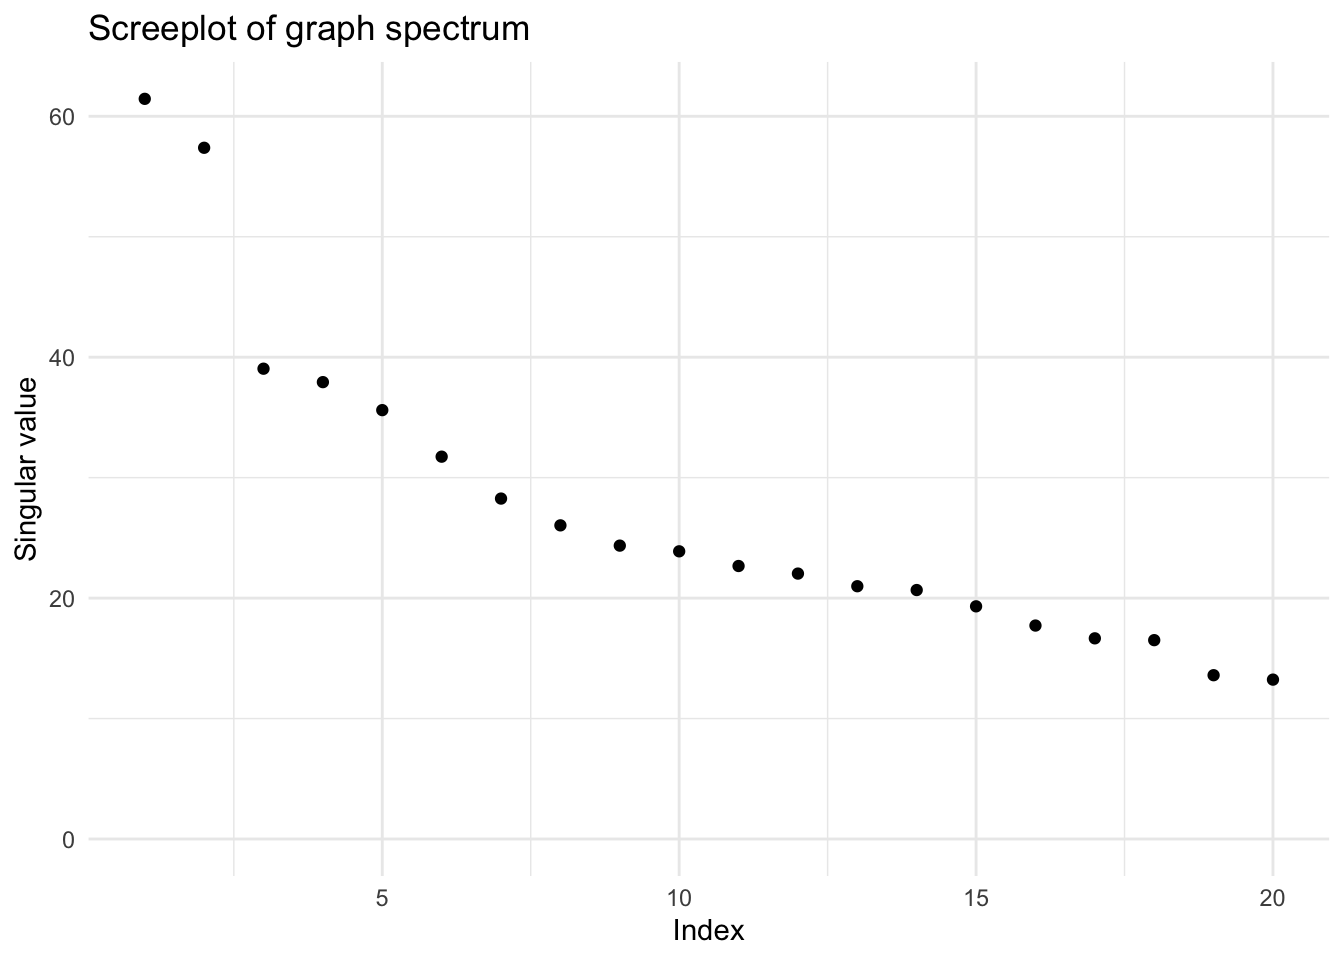

In [ ]:
sensing_mat_imp_z_red = as.matrix(scale(phonedata_sensing_imp[, red_vars]))
colnames(sensing_mat_imp_z_red) = colnames(phonedata_sensing_imp[, red_vars])
sensing_mat_imp_z_red = as(sensing_mat_imp_z_red, "dgCMatrix")
screeplot(vsp(sensing_mat_imp_z_red, rank = 20,
  degree_normalize = FALSE, center = TRUE))


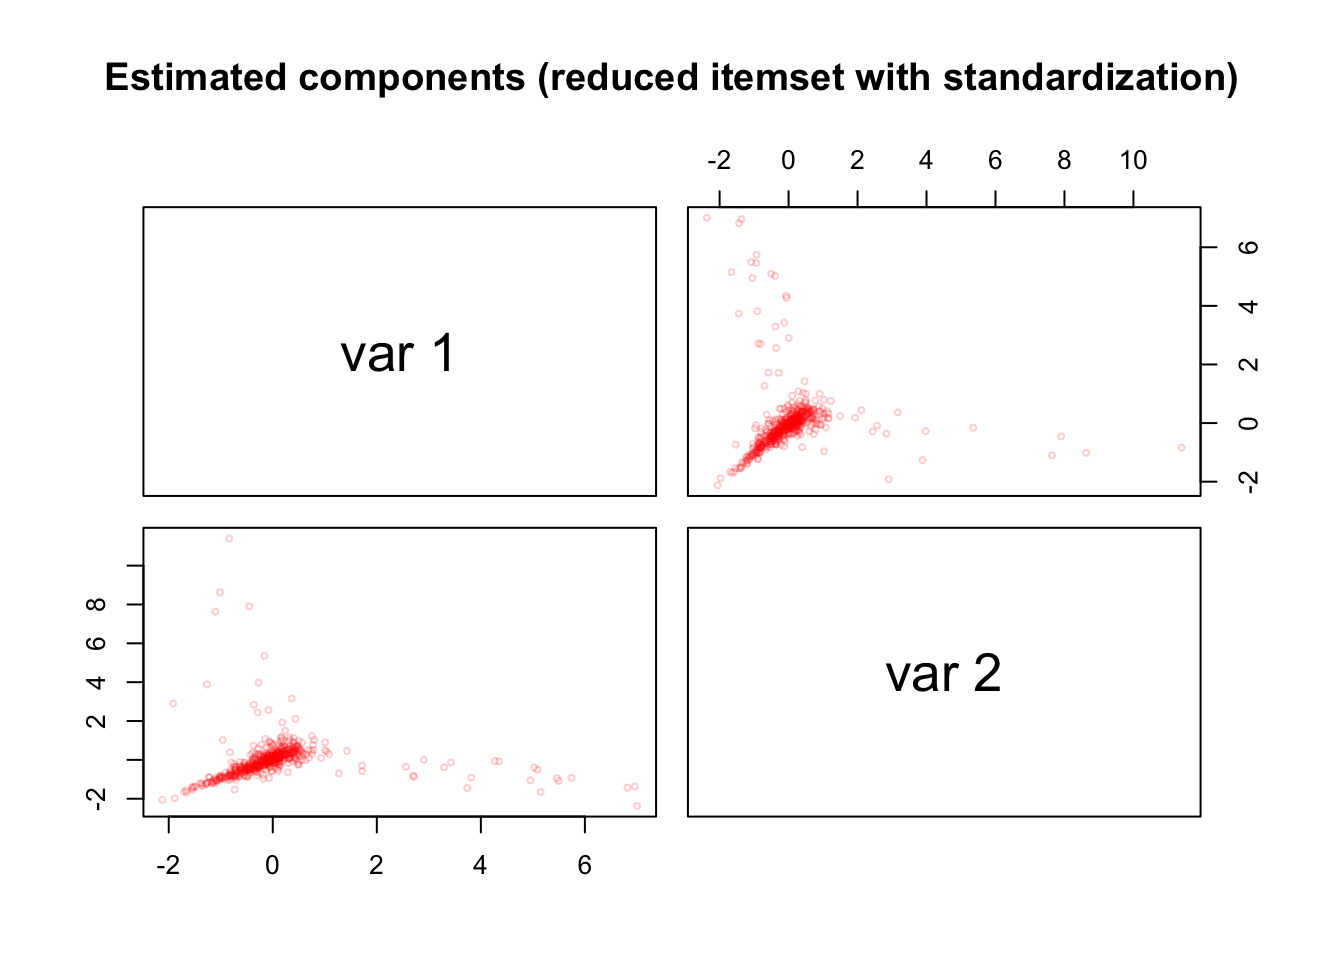

In [ ]:
pca_sensing_imp_z_red = vsp(sensing_mat_imp_z_red, rank = 2, 
  degree_normalize = FALSE, center = TRUE)
pairs(as.matrix(pca_sensing_imp_z_red$Z[, 1:2]), cex = 0.5, col = alpha("red", alpha = 0.2), 
  main = "Estimated components (reduced itemset with standardization)")


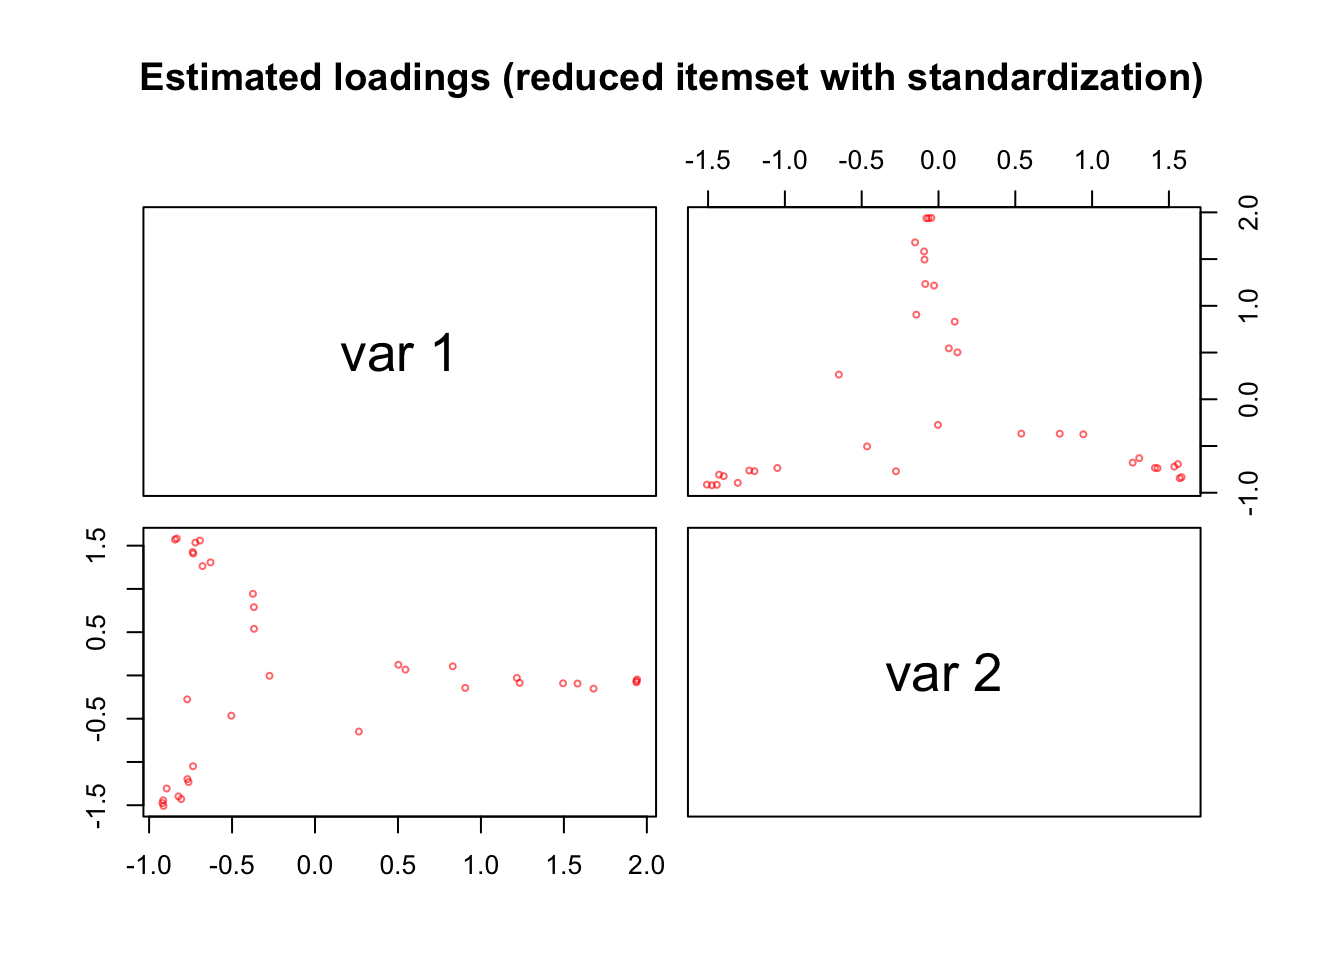

In [ ]:
pairs(as.matrix(pca_sensing_imp_z_red$Y[, 1:2]), cex = 0.5, col = alpha("red", alpha = 0.6), 
  main = "Estimated loadings (reduced itemset with standardization)")


In [ ]:
n = 10
top_vars = data.frame(
  GPS1 = names(sort(abs(pca_sensing_imp_z_red$Y[, 1]), decreasing = TRUE)[1:n]),
  GPS2 = names(sort(abs(pca_sensing_imp_z_red$Y[, 2]), decreasing = TRUE)[1:n])
)
kable(top_vars)


  -------------------------------------------------------------------------
  GPS1                                 GPS2
  ------------------------------------ ------------------------------------
  rog                                  mean_time_LeaveHome

  maxDistance                          mean_time_LeaveHome_weekday

  max_distance_home                    mean_time_firstLeave

  SDD                                  mean_dur_wakeLeave

  SDD_daytime                          huberM_max_dist_two_points_daily

  SDD_weekend                          huberM_rog_daily

  SDD_sat                              huberM_max_dist_two_points_weekday

  SDD_weekday                          huberM_distance_covered_daily

  huberM_rog_daily                     huberM_time_spent_home_weekday

  huberM_max_dist_two_points_weekday   huberM_time_spent_home
  -------------------------------------------------------------------------


# Simulation: Correlated Factors

Another important aspect of psychological applications of PCA+VR are correlated factors (e.g., the personality dimensions conscientiousness and neuroticism are thought to correlate around $-0.4$; Linden et al. ([2010](#ref-vanderlinden2010general))), thus oblique rotations are often argued for. Interestingly, R&Z show as a side result that the results of PCA+VR can be used to also estimate correlated factors in situations which are relevant for psychological measurement models.

In [ ]:
library(vsp)
library(Matrix)
library(scales)
library(mvtnorm)


Here we demonstrate that $\hat{Z}\hat{B}$ (up to a change of units) estimates correlated factors simulated from a leptokurtic distribution:

1.  Simulate correlated factor scores from a multivariate leptokurtic distribution.

In [ ]:
set.seed(3)

n = 10000
rho = 0.7
# adapted from https://github.com/RoheLab/vsp-paper/blob/master/scripts/makeFigure1.R
Z_star = scale(matrix(sample(c(-1,1), 2 * n, T) * 
    rexp(n * 2, rate = 2) ^ 1.3, ncol = 2))
cor_mat = matrix(c(1, rho, rho, 1), ncol = 2)
Z = Z_star %*% chol(cor_mat)


We first simulate two-dimensional uncorrelated standardized scores from a leptokurtic distribution ($Z^*$). Correlated scores ($Z$) are then constructed by multiplying the uncorrelated scores with the Cholesky factor of a correlation matrix with the desired correlation ($\rho = 0.7$).

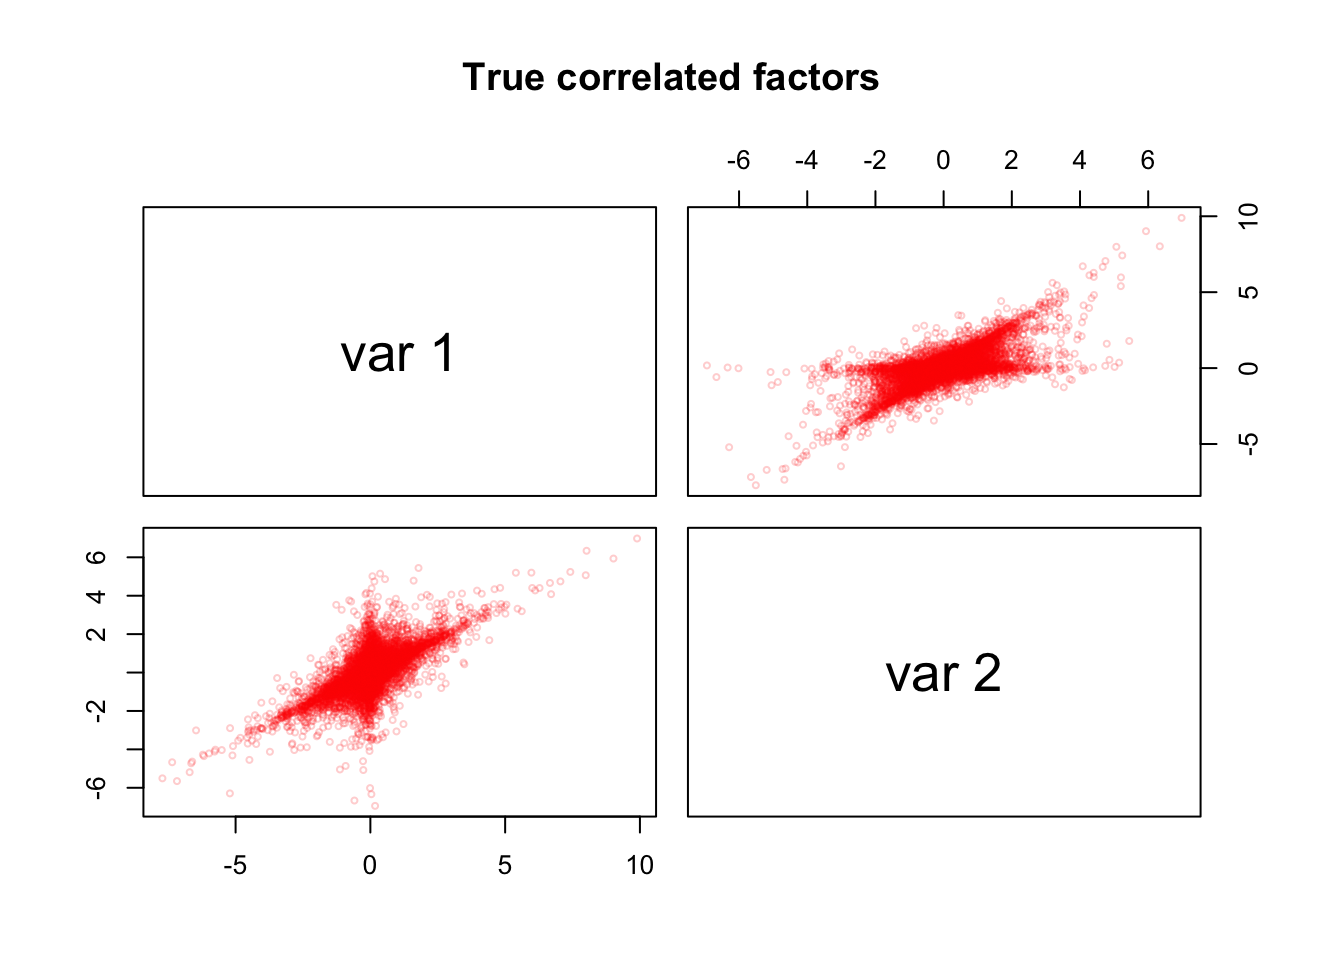

In [ ]:
pairs(Z, cex = 0.5, col = alpha("red", alpha = 0.2), 
  main = "True correlated factors")


When plotting the simulated component scores in the $Z$ matrix, we see non-orthogonal streaks (i.e. oblique components).

1.  Simulate item response data.

In [ ]:
k = 2
vpf = 20
d = vpf*k

pf_low = 0.8
pf_upper = 0.95
sf_low = 0
sf_upper = 0

loadings = function(k, d, vpf, pf_low, pf_upper, sf_low, sf_upper){
  x = runif(d, pf_low, pf_upper)
  y = runif(d*(k-1) , sf_low, sf_upper)
  i = 1:(d)
  j = rep(1:k, each = vpf)
  L = matrix(NA, d, k)
  L[cbind(i, j)] = x
  L[is.na(L)] = y
  L
}

Y = loadings(k, d, vpf, pf_low, pf_upper, sf_low, sf_upper)
A =  Z %*% t(Y) + rnorm(n * d, sd = 0.1)


We create a loading matrix $Y$ with simple structure and simulate the data matrix $A$ with $ZY^T$ and add some normally distributed noise.

1.  Perform PCA + Varimax

In [ ]:
pca_sim = vsp(A, rank = 2, degree_normalize = FALSE)


1.  Estimate uncorrelated component scores $Z$

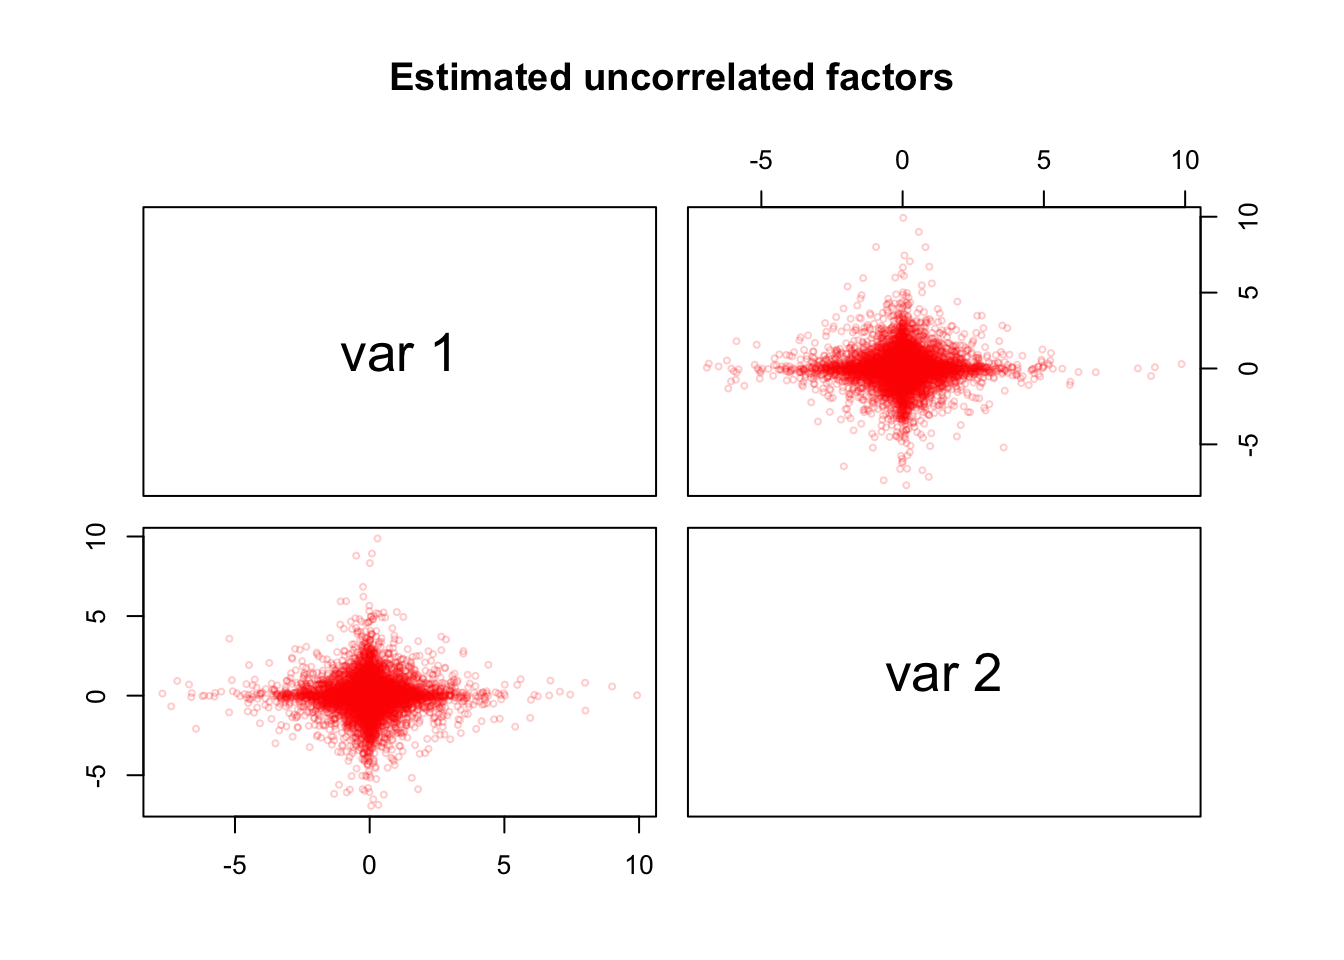

In [ ]:
pairs(as.matrix(pca_sim$Z[, 1:2]), cex = 0.5, col = alpha("red", alpha = 0.2), 
  main = "Estimated uncorrelated factors")


When plotting the $\hat{Z}$ matrix returned from PCA+VR, we see orthogonal streaks similar to $Z^*$.

1.  Estimate correlated component scores $Z$

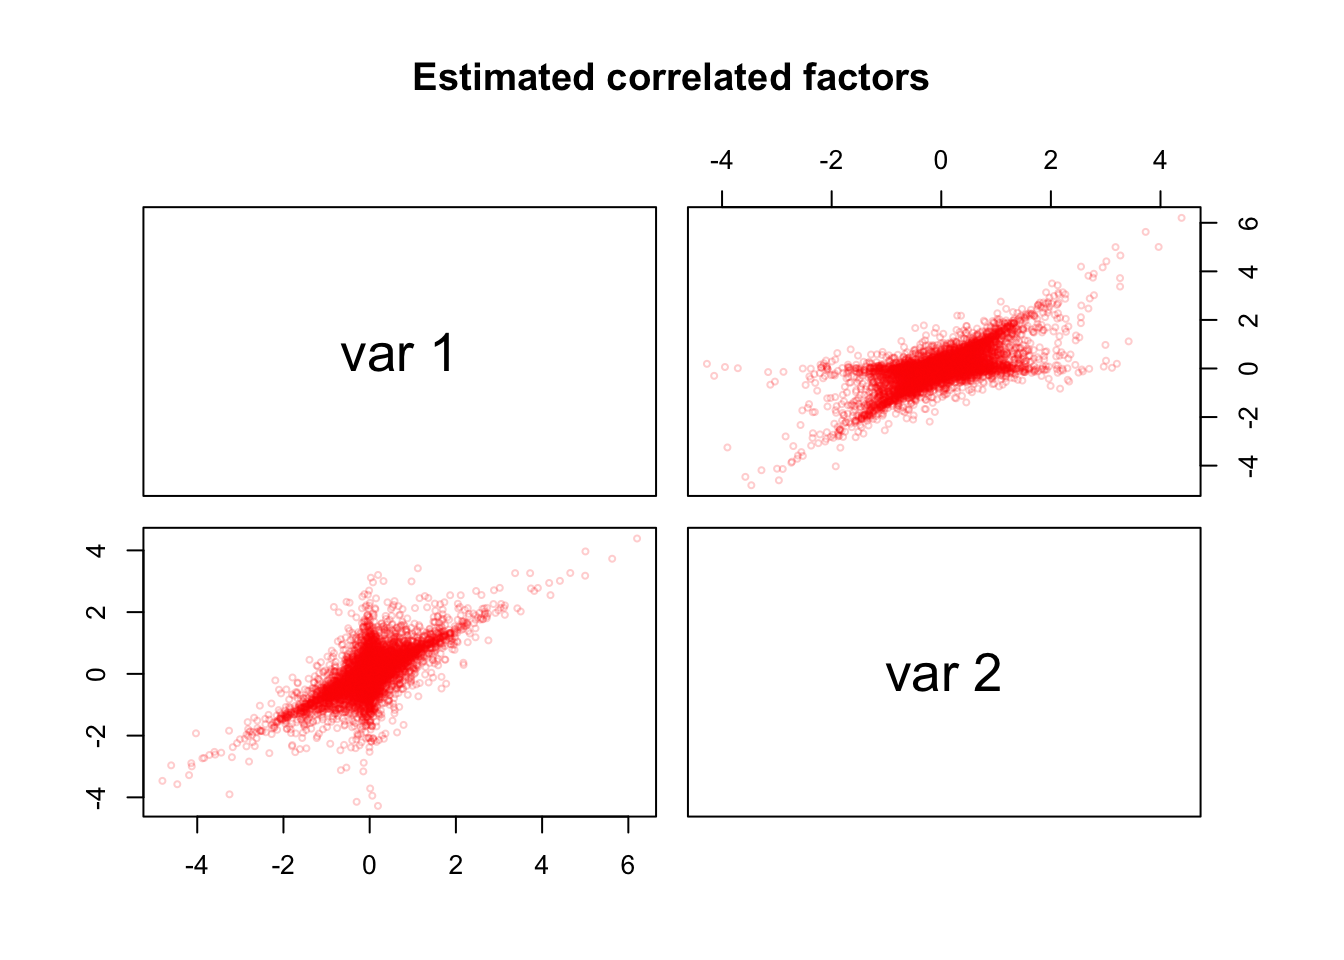

In [ ]:
ZB_hat = as.matrix(pca_sim$Z) %*% as.matrix(pca_sim$B)
pairs(ZB_hat, cex = 0.5, col = alpha("red", alpha = 0.2), 
  main = "Estimated correlated factors")


However, the matrix $\hat{Z}\hat{B}$ contains correlated components similar to $Z$.

1.  Estimate correlation between components

In [ ]:
cor(ZB_hat)


          [,1]      [,2]
[1,] 1.0000000 0.7033317
[2,] 0.7033317 1.0000000

We can verify that the correlation of the scores in $\hat{Z}\hat{B}$ are close to the true correlation in $Z$ ($\rho = 0.7$).

Our simulation seems to demonstrate the results from sections **7.1** and **7.2** in R&Z, which state that if scores in $Z$ are correlated; scores in $Y$ are centered, independent, and leptokurtic; and the true $B$ is proportional to the identity matrix, then the $\hat{B}$ matrix returned from PCA+VR estimates the Cholesky factor of the covariance matrix $Z^TZ$ (up to a change of unit). Note that because our scores in $Z$ were scaled, $Z^TZ$ is equal to the correlation matrix in our demonstration.

## Open Questions

Surprisingly, the exact scores in $Z$ (in the same unit) seem to be estimated by $\hat{Z}\hat{B}\cdot d^{1/8}$.

In [ ]:
nrows = 10
compare_scores = data.frame(
  z1 = Z[1:nrows, 1],
  z1_hat = ZB_hat[1:nrows, 1] * d^(1/8),
  z2 = Z[1:nrows, 2],
  z2_hat = ZB_hat[1:nrows, 2] * d^(1/8),
row.names = NULL)
kable(compare_scores)


            z1       z1_hat           z2       z2_hat
  ------------ ------------ ------------ ------------
    -0.8175379   -0.8258829    0.3337107    0.3052195
     0.1451648    0.1404835    0.9071543    0.9425134
     0.3726275    0.3342478   -0.0673917   -0.0741674
    -0.0312845   -0.0496686    1.0465835    1.0630476
     0.0533857    0.0278354   -0.0289375   -0.0004230
     2.7693088    2.7368688    2.0474298    2.0732120
     0.6403584    0.6849868    0.3958977    0.3967702
    -0.5940332   -0.5576306   -0.1732053   -0.1453989
    -0.2614659   -0.2740095   -0.7323451   -0.7558590
     0.6697399    0.6585350    0.4020305    0.4119104


Unfortunately, we were not able not determine why or whether this might be just a coincidence here. To conclude, we agree with the following comment in R&Z ([Rohe & Zeng, 2023](#ref-rohe2023vintage)) and are looking forward to further research in this direction:

> Taken together, this all suggests that the B matrix provides a path to understanding “correlation among the factors.” Understanding this phenomenon is an active area of research in our lab.

# References

Arendasy, M., Sommer, M., & Feldhammer, M. (2011). Manual Big-Five Structure Inventory BFSI. *Schuhfried Gmbh, Mödling*.

Linden, D. van der, Nijenhuis, J. te, & Bakker, A. B. (2010). The General Factor of Personality: A meta-analysis of Big Five intercorrelations and a criterion-related validity study. *Journal of Research in Personality*, *44*(3), 315–327. <https://doi.org/10.1016/j.jrp.2010.03.003>

Pargent, F., Goretzko, D., & Oertzen, T. von. (2023). <span class="nocase">Florian Pargent, David Goretzko and Timo von Oertzen’s contribution to the Discussion of “Vintage Factor Analysis with Varimax Performs Statistical Inference” by Rohe  
&amp; Zeng</span>. *Journal of the Royal Statistical Society Series B: Statistical Methodology*, *85*(4), 1087–1088. <https://doi.org/10.1093/jrsssb/qkad054>

Rohe, K., & Zeng, M. (2023). <span class="nocase">Vintage factor analysis with Varimax performs statistical inference</span>. *Journal of the Royal Statistical Society Series B: Statistical Methodology*, *85*(4), 1037–1060. <https://doi.org/10.1093/jrsssb/qkad029>

Stachl, C., Au, Q., Schoedel, R., Gosling, S. D., Harari, G. M., Buschek, D., Völkel, S. T., Schuwerk, T., Oldemeier, M., Ullmann, T., Hussmann, H., Bischl, B., & Bühner, M. (2020). Predicting personality from patterns of behavior collected with smartphones. *Proceedings of the National Academy of Sciences of the United States of America*, *117*(30), 17680–17687. <https://doi.org/10.1073/pnas.1920484117>